# Ensemble Models and Outlook

In the past chapters, several common machine learning algorithms were introduced. They come with different strengths and weaknesses. And, although the code execution always looks very similar, they all require different parameters and adjustments.

Before we move on to the next topic, let us introduce a very generally applicable trick in machine learning: **ensemble learning**. 

Ensemble learning is a method where multiple models, often called "weak learners," are trained and combined to solve the same problem. The key idea is that by combining multiple models, we can achieve better performance than any single model alone. This idea is simple, yet in practice, ensemble models are surprisingly effective. There are two main types of ensemble methods: bagging and boosting.

We will apply some common strategies to the data from the last chapter on predicting obesity levels.

In [5]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb

In [6]:
filename = "../datasets/obesity_dataset.csv"
data = pd.read_csv(filename)

mask = data.describe(include="all").loc["unique"] == 2
binary_columns = data.columns[mask]
data[binary_columns] = data[binary_columns].replace({'no': 0, 'yes': 1})

y = data.NObeyesdad
X = data.drop(["NObeyesdad"], axis=1)

X = pd.get_dummies(X) #, prefix='', prefix_sep='')
X = X.drop(["Gender_Male"], axis=1)  # not necessary, because here it is either Male or Female
X.head()

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,SCC,...,CAEC_no,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,1,0,2.0,3.0,0,2.0,0,...,False,False,False,False,True,False,False,False,True,False
1,21.0,1.52,56.0,1,0,3.0,3.0,1,3.0,1,...,False,False,False,True,False,False,False,False,True,False
2,23.0,1.80,77.0,1,0,2.0,3.0,0,2.0,0,...,False,False,True,False,False,False,False,False,True,False
3,27.0,1.80,87.0,0,0,3.0,3.0,0,2.0,0,...,False,False,True,False,False,False,False,False,False,True
4,22.0,1.78,89.8,0,0,2.0,1.0,0,2.0,0,...,False,False,False,True,False,False,False,False,True,False


In [7]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Single Decision Tree
Let's start again with a single decision tree, here with a set max_depth.
As we saw in the last chapter, such a model works OK-ish on this dataset.

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize base classifier
tree = DecisionTreeClassifier(max_depth=6)
tree.fit(X_train, y_train)

# Make predictions
y_pred = tree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Decision Tree Classifier: {accuracy:.2f}')

Accuracy of Decision Tree Classifier: 0.86


## Bagging (Bootstrap Aggregating)

Bagging is a technique that involves training multiple models on different subsets of the training data and then combining their predictions. Each subset is created by randomly sampling the training data with replacement (bootstrap sampling). The final prediction is usually obtained by averaging the predictions (for regression) or taking a majority vote (for classification).

The most common example for such an ensemble model is the **Random Forest**.

### Many Trees are a Forest: Random Forest

Random Forest is an ensemble method that combines multiple decision trees using bagging and random feature selection. Each tree is trained on a different bootstrap sample of the data, and a random subset of features is used for splitting nodes. The final prediction is made by averaging the predictions of all individual trees (for regression) or by majority voting (for classification).

We could implement this by just combining multiple decision trees, for instance via the Scikit-Learn `BaggingClassifier` class:

In [23]:
from sklearn.ensemble import BaggingClassifier

# Initialize base classifier
base_clf = DecisionTreeClassifier(max_depth=6)

# Initialize bagging classifier
bagging_clf = BaggingClassifier(estimator=base_clf, n_estimators=50, random_state=42)

# Train the bagging classifier
bagging_clf.fit(X_train, y_train)

# Make predictions
y_pred = bagging_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Bagging Classifier: {accuracy:.2f}')

Accuracy of Bagging Classifier: 0.89


However, the **Random Forest** is famous enough to be implemented already in Scikit Learn:

In [26]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest classifier
rf_clf = RandomForestClassifier(max_depth=6, n_estimators=50, random_state=42)

# Train the Random Forest classifier
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred = rf_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Random Forest Classifier: {accuracy:.2f}')


Accuracy of Random Forest Classifier: 0.89


### Boosting

Boosting is another ensemble technique that focuses on training models sequentially. Each new model attempts to correct the errors made by the previous ones. This way, the models "boost" the performance by focusing more on the difficult cases.

In [24]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize base classifier
base_clf = DecisionTreeClassifier(max_depth=6)

# Initialize AdaBoost classifier
ada_clf = AdaBoostClassifier(estimator=base_clf, n_estimators=50, random_state=42)

# Train the AdaBoost classifier
ada_clf.fit(X_train, y_train)

# Make predictions
y_pred = ada_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of AdaBoost Classifier: {accuracy:.2f}')


Accuracy of AdaBoost Classifier: 0.96


With some more parameters searches we can probably improve even a little more... (try it out yourself!).

In [37]:
base_clf = DecisionTreeClassifier(max_depth=10)
ada_clf = AdaBoostClassifier(estimator=base_clf, n_estimators=200, random_state=42)
ada_clf.fit(X_train, y_train)

y_pred = ada_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of AdaBoost Classifier: {accuracy:.2f}')

Accuracy of AdaBoost Classifier: 0.97


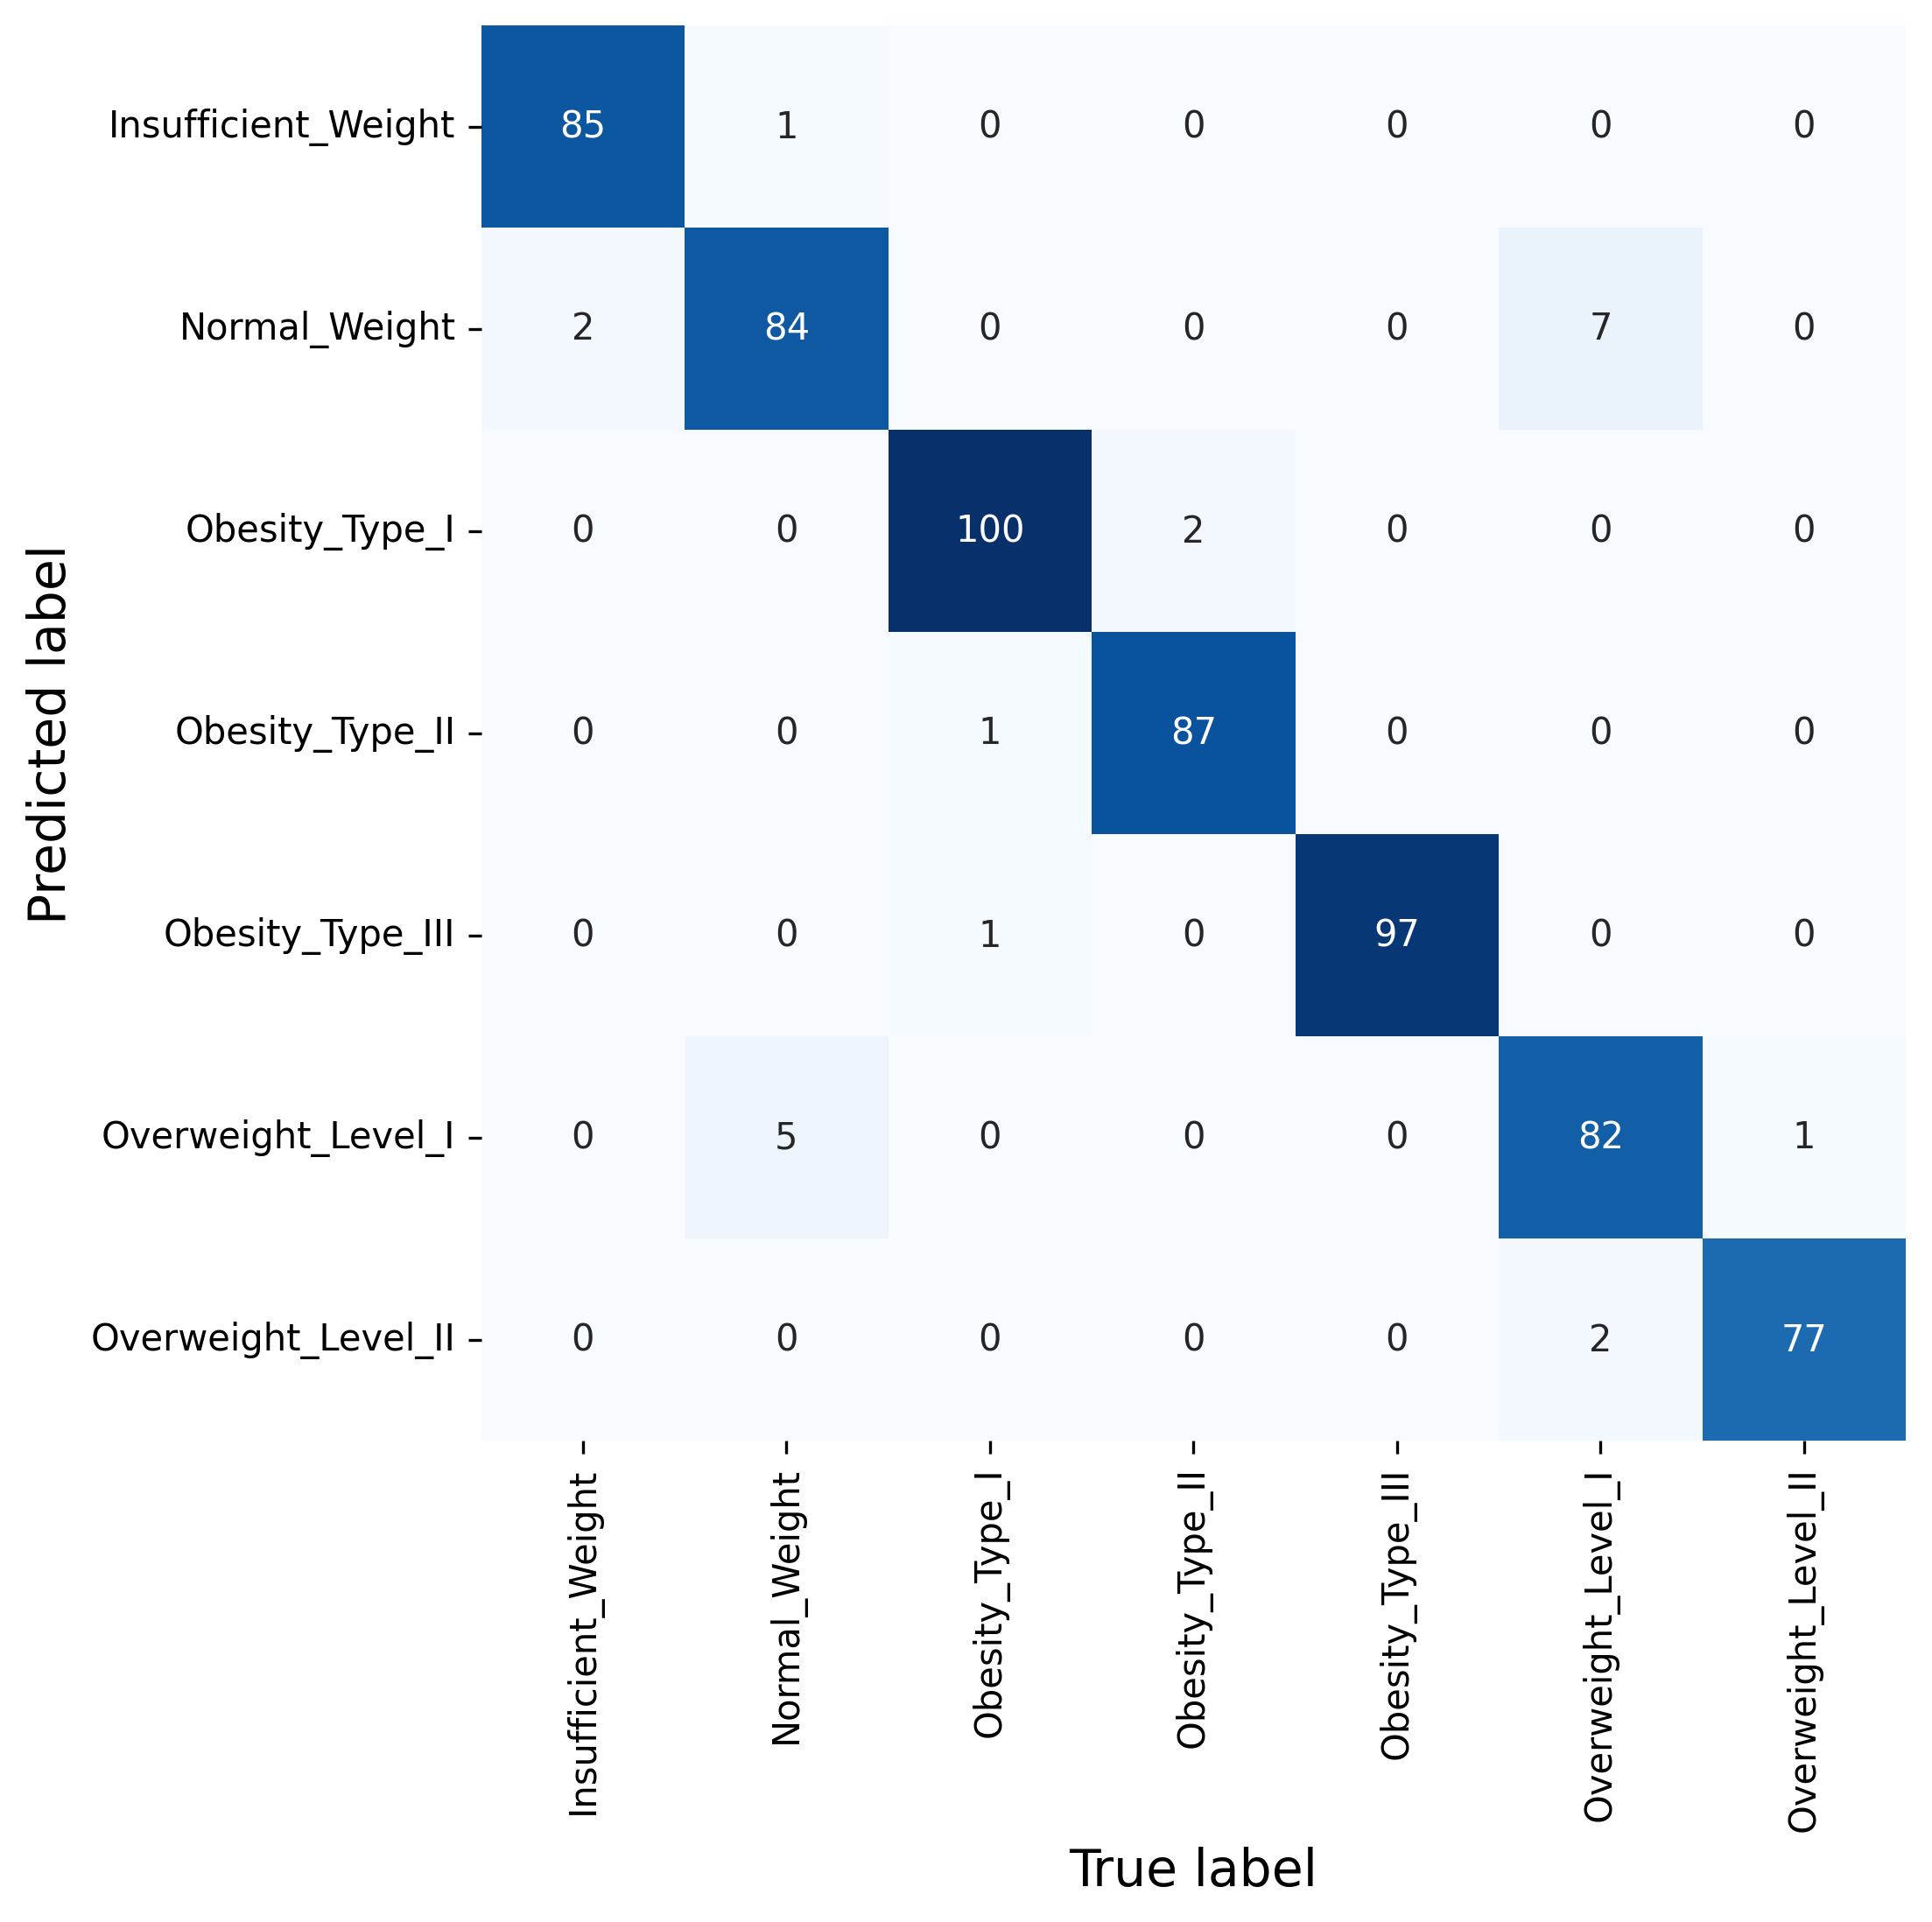

In [38]:
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(figsize=(7, 7), dpi=300)

sb.heatmap(confusion_matrix(y_test, y_pred),
           annot=True, cmap="Blues", cbar=False, fmt=".0f",
           xticklabels=ada_clf.classes_,
           yticklabels=ada_clf.classes_)
ax.set_xlabel("True label", fontsize=14)
ax.set_ylabel("Predicted label", fontsize=14)
plt.show()

## Outlook: More on Machine Learning

This course is meant as a general introduction to data science. Machine Learning is, no doubt, one of the most essential tools for any data scientist to know about. In fact, it is not just one tool but an entire toolbox full of very powerful methods. It is important to know at least common examples of the most prominent types of tools, including unsupervised methods such as clustering techniques and dimensionality reduction, as well as supervised methods like k-nearest neighbors, linear regression, or decision trees.

However, this will just give you a first impression of what is possible with machine learning. In addition, we will focus on a basic intuition and first application of these methods. We will not cover all algorithms in full depth.

To deepen your understanding of individual methods and broaden your knowledge on various techniques, you might want to explore further. This includes the large field of deep learning, which we cannot cover in this course.

### Further Learning Resources

**Online courses and tutorials:**  
There are many, in fact probably too many, courses and tutorials out there. One of them that is clearly a long time recommendation is Andrew Ng's open online courses such as the [Machine Learning Introduction on coursera](https://www.coursera.org/specializations/machine-learning-introduction).

**Books on Machine Learning and Deep Learning:**  
- "Machine Learning with PyTorch and Scikit-Learn: Develop machine learning and deep learning models with Python" {cite}`raschka2022machine`
- "Understanding Deep Learning" by Simon Prince, MIT Press, 2023 {cite}`prince2023understanding`

By continuing to explore these resources, you can build a solid foundation in machine learning and stay up-to-date with the latest advancements in the field.

Happy (machine) learning!